# (Target 2021 Dataset )


## Preliminary Wrangling

> the dataset i used is Target 2021 Dataset that contains one table , 14886 observations in the dataset with 15 features . There is 7 categorical variables (Business Line , Region , TBC Program , Mahdar Isnad ,TBC Ref , Project Name ,Data Tybe) and the others are numerical variables., to get these tables from a database I loaded it in a Data frame called data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
## this function show me all information of Target Dataset
def print_info(data):
    #print the number of raws 
    print('number of observations in Target dataset:',data.shape[0])
    # print the number of columns 
    print('number of columns in Target dataset:',data.shape[1])
    # print the number of null values
    print('number of null values in Target dataset:',data.isnull().sum().sum())
    # print the number of all dublicated values
    print('number of dublicated values in Target dataset:',data.duplicated().sum())
    print("*"*60)
    # print all data types of Target Dataset
    print(data.info())
    print("*"*60)
     # print all Statistics summary of Target Dataset
    print(data.describe())

In [3]:
# load the data on DataFrame called data
data=pd.read_excel('2021 Target.xlsx')

In [4]:
#show the first 5 observations from data DataFrame
data.head()

,Business Line,Region,TBC Program,Mahdar Isnad,TBC Ref,Project ID,Project Name,Contractor Sign,Isnad Duration,Exp. FinIsh,Budget,Data Tybe,Total 2021,Revenue Date,Revenue Amount
0,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,07-Jan-21,155741.0775
1,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,14-Jan-21,155741.0775
2,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,21-Jan-21,155741.0775
3,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,28-Jan-21,155741.0775
4,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,4-Feb-21,155741.0775


In [5]:
# call print_info to display info of data DataFrame
print_info(data)

number of observations in Target dataset: 19358
number of columns in Target dataset: 15
number of null values in Target dataset: 7195
number of dublicated values in Target dataset: 0
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19358 entries, 0 to 19357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Business Line    19358 non-null  object        
 1   Region           19358 non-null  object        
 2   TBC Program      19358 non-null  object        
 3   Mahdar Isnad     19358 non-null  object        
 4   TBC Ref          19358 non-null  object        
 5   Project ID       18514 non-null  float64       
 6   Project Name     19358 non-null  object        
 7   Contractor Sign  15188 non-null  datetime64[ns]
 8   Isnad Duration   19274 non-null  float64       
 9   Exp. FinIsh      17345 non-null  datetime64[ns]
 10  Budget

# **cleaning**

In [6]:
## remove null values
data.dropna(axis=0, how='any',inplace=True)
#check if there are more
data.isnull().sum().sum()

0

In [7]:
#split the year of Contractor Sign to use it as a year of starting a Project
data['year']=pd.to_datetime(data['Contractor Sign']).dt.year
data.head()

,Business Line,Region,TBC Program,Mahdar Isnad,TBC Ref,Project ID,Project Name,Contractor Sign,Isnad Duration,Exp. FinIsh,Budget,Data Tybe,Total 2021,Revenue Date,Revenue Amount,year
0,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,07-Jan-21,155741.0775,2018
1,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,14-Jan-21,155741.0775,2018
2,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,21-Jan-21,155741.0775,2018
3,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,28-Jan-21,155741.0775,2018
4,CONSULTANCY,KIN,SRC2,17,17,38001.0,الراجحي 017,2018-04-01,11.0,2021-03-26,18142740.0,Target Revenue,1868892.93,4-Feb-21,155741.0775,2018


In [8]:
#convert Revenue Date from string to date 
data['Revenue Date']=pd.to_datetime(data['Revenue Date'])
#convert Project ID from float to int 
data['Project ID']=data['Project ID'].astype(int)

In [9]:
# call print_info to display info of data DataFrame
print_info(data)

number of observations in Target dataset: 14886
number of columns in Target dataset: 16
number of null values in Target dataset: 0
number of dublicated values in Target dataset: 0
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14886 entries, 0 to 19268
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Business Line    14886 non-null  object        
 1   Region           14886 non-null  object        
 2   TBC Program      14886 non-null  object        
 3   Mahdar Isnad     14886 non-null  object        
 4   TBC Ref          14886 non-null  object        
 5   Project ID       14886 non-null  int32         
 6   Project Name     14886 non-null  object        
 7   Contractor Sign  14886 non-null  datetime64[ns]
 8   Isnad Duration   14886 non-null  float64       
 9   Exp. FinIsh      14886 non-null  datetime64[ns]
 10  Budget   

# **EDA Section**
<ul>
<li><a href="#Question1">Question1</a></li>
<li><a href='#Question2'>Question2</a></li>
<li><a href='#Question3'>Question3</a></li>

### What is the structure of your dataset?

>There are 14886 observations in the dataset with 16 features . There is
7 categorical variables (Business Line , Region , TBC Program , Mahdar Isnad ,TBC Ref , Project Name ,Data Tybe) and the others are numerical variables.

### What is/are the main feature(s) of interest in your dataset?

>The main feature in the Target data is Region.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Project ID,Budget  variables

## Univariate Exploration



<a id='Question1'></a>
## **Question1: what is the number of Projects of each region in Target dataset?.**

Text(0.5, 1.0, 'Number of projects in each Regions')

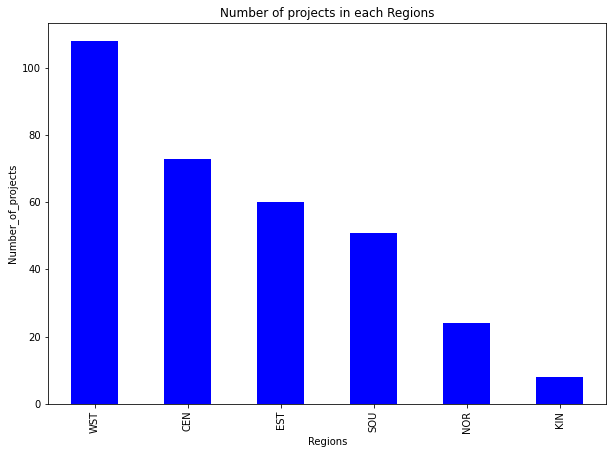

In [10]:
#create a new data set called region to groupby region ,Project ID columns in it
Regions=data.groupby(['Region','Project ID']).count().reset_index().iloc[:,0:2]
#make a bar plot for Region column in Region dataset
Regions['Region'].value_counts().plot.bar(figsize=(10,7),color='b')
plt.xlabel('Regions')
plt.ylabel('Number_of_projects')
plt.title('Number of projects in each Regions')

## **the above plot show the number of Projects in each Region for Region dataset**
>1. X-axis is Regions
>2. Y-axis is Number of Projects
>3. conclusion that the largest number of projects for WST Region 
## next: show the relationship between budget and year of starting a project

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>A distribution is called skewed right as per the location of the regions on the map of Saudi arabia
 ,as in the above plot, the right tail (larger values) is much longer than the left tail (small values).
there are no any unusal points.
create a new data set called Region to groupby Region ,Project ID columns in it
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>the distribution of groupby Region and Project ID variable is skewed variable.
i did operations on the data becaues there is hindrance such null values, incorrect data types of variables,split the year of date columns to use it in investigate the dataset

## Bivariate Exploration



<a id='Question2'></a>
## **Question2:is there relationship between budget and Start year ?.**

In [11]:
#grouby year and calculate mean of Budget for each year to know the avg of Budget in each year and make a plot to find relationship between them
data.groupby('year')['Budget'].mean().reset_index()

,year,Budget
0,2018,1.820687e+07
1,2019,1.003737e+07
2,2020,1.467616e+07
3,2021,2.500000e+07


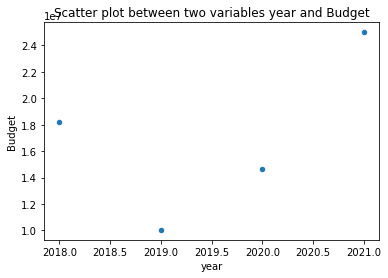

In [12]:
#make a plot to find relationship between year and avg of  Budget
data.groupby('year')['Budget'].mean().reset_index().plot.scatter(x='year', y='Budget', title="Scatter plot between two variables year and Budget")
plt.show()

## **the above plot show the relationship between year and mean of budget of each year**
>1. X-axis is year
>2. Y-axis is budget
>3. conclusion there is no correlation  between year and mean of budget of each year in Target dataset.
## next i will show view of all variables and their relationships with all other variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>the above plot show the relationship between year and mean of budget of each year,
there is no correlation between year and mean of budget of each year in Target dataset

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>yes there is relationships between the other features i will discuss it in next section

## Multivariate Exploration



<a id='Question3'></a>
## **Qusetio3:shows a clear and nice view of all variables and their relationships with all other variables.**

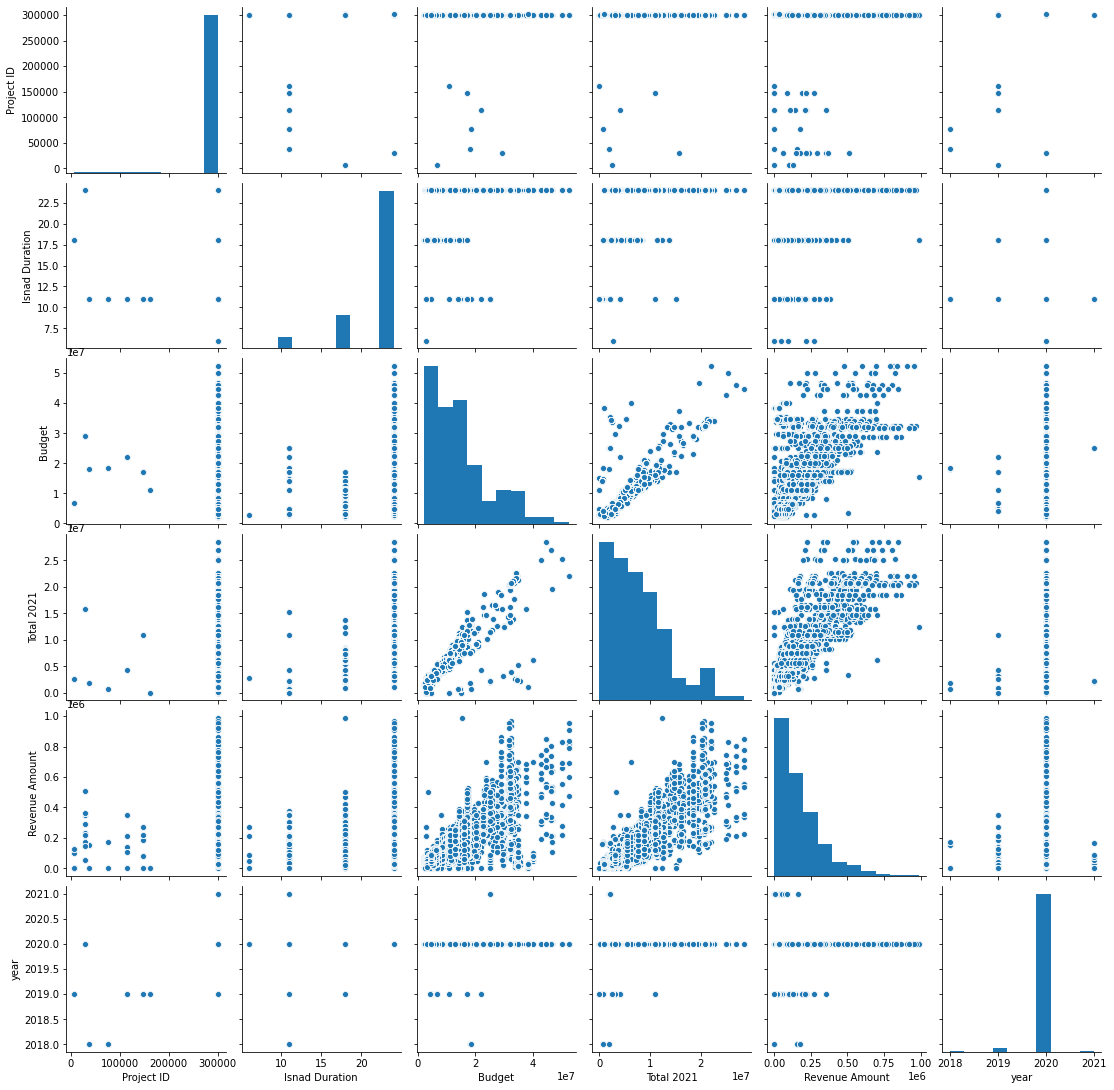

In [13]:
#by using seaborn lib i maked plot to show relationships with all other variables
sb.pairplot(data)
plt.show()

## **the above plot is view of all variables and their relationships with all other variables**
### conclusion: here are strong relationships betwwen features and each other like (budget,total 2021) variables

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>there are strong relationships betwwen features and each other like
(budget,total 2021) variables,(budget,Revenue amount)variables and(Total 2021,Revenue amount) 

### Were there any interesting or surprising interactions between features?
> no

# Summary
the dataset i used is Target Dataset that contains one table , 14886 observations in the dataset with 16 features . There is 7 categorical variables and the others are numerical variables.
befor EDA Process i needed to clean the data based on the Questions.
#### there is hindrance such:
###### 1-null values ,dropped them from data
###### 2-inccorect data types like Project ID variable ,convert it from float to int . Revenue Date variable convert it from string to date type.
###### 3-split year from Contractor Sign variable to use it in analysis.
## - in EDA section
1. i have three questions and their visualization.
    1. first plot i discovered that the largest number of Projects is done in WST region.
    2. second plot i discovered that there is no correlation between years and budget variable.
    3. third plot i discoered the relationships between all variables and each other , and there are strong relationships like (budget,total 2021) variables,(budget,Revenue amount)variables and(Total 2021,Revenue amount) 